# Heat Fluxes

In [201]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter
import scipy.interpolate as interpolate
from flox.xarray import xarray_reduce

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [3]:
# Set title size
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16  # Titles larger

# Set axis label size
plt.rcParams['axes.labelsize'] = 14  # Labels slightly smaller

# Load data (from eddy_diff notebook)

In [4]:
diff_rho = xr.open_dataset('/swot/SUM05/amf2288/diff_rho_3.nc')
K_rho = diff_rho.K_rho

In [5]:
K_rho = K_rho.rename({'rho_grid':'density','lon_c':'lon','lat_c':'lat'})

In [6]:
ds_rho = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/ds_rho_binned_high_res.nc')

In [10]:
%%time
term2_ds = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/term2.nc').load()
term2 = term2_ds.ct_e_z2_filt.rename('term2')
Ke_term3 = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/Ke_term3.nc').rename('term3').load()
ct_m_dx = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/ct_m_dx.nc')
ct_m_dy = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/ct_m_dy.nc')

CPU times: user 27.2 ms, sys: 233 ms, total: 261 ms
Wall time: 258 ms


In [11]:
term3 = np.sqrt(Ke_term3)

In [12]:
%%time
temp_flux_dxdy = K_rho*(term2/term3)

CPU times: user 95.9 ms, sys: 153 ms, total: 249 ms
Wall time: 246 ms


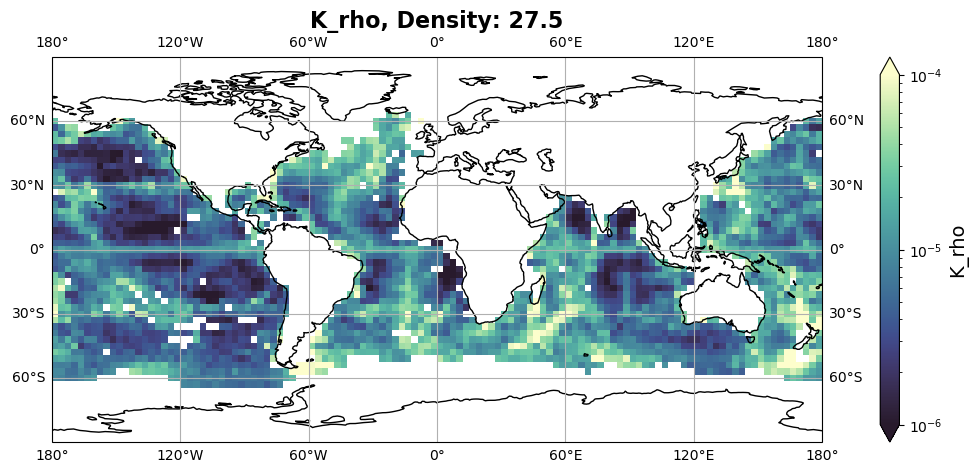

In [13]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
K_rho.sel(density=density, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-6, vmax=1e-4))
ax.set_title('K_rho, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/K_rho_275.png', bbox_inches='tight')

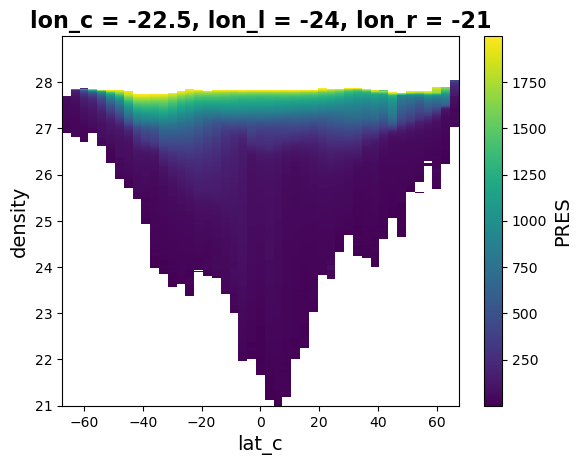

In [15]:
lon=-22.5
ds_rho.PRES.sel(lon_c=lon, method='nearest').plot(x='lat_c', y='density')

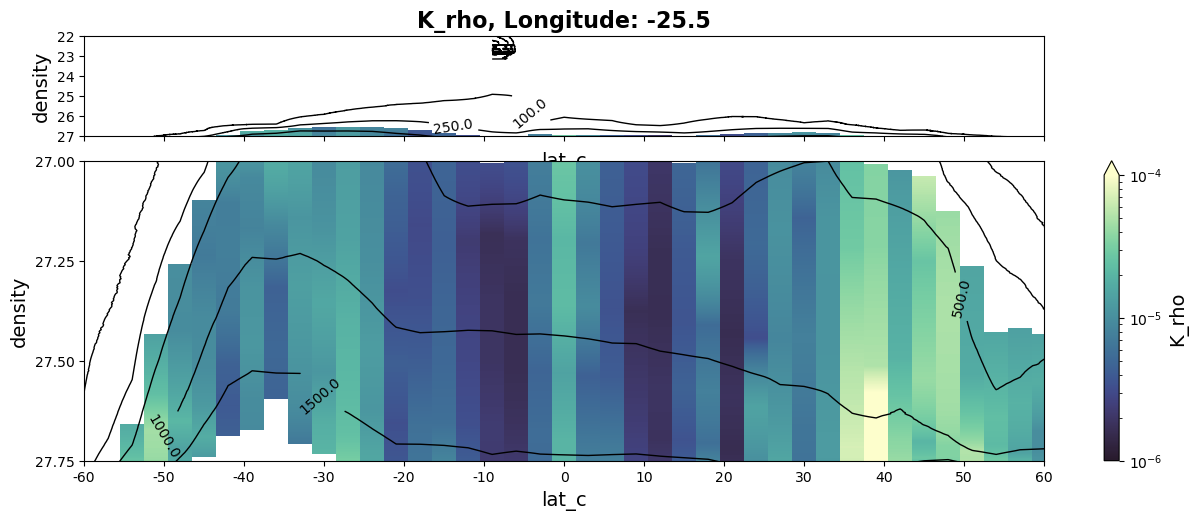

In [22]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-6, vmax=1e-4)
levels = [100, 250, 500, 1000, 1500, 2000]

K_rho.sel(lon=lon, method='nearest').plot(ax=top_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(22, 27.5, 1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(22, 27)
top_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=top_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
top_ax.invert_yaxis()
top_ax.set_title(f'K_rho, Longitude: {K_rho.sel(lon=lon, method="nearest").lon.values}')

K_rho.sel(lon=lon, method='nearest').plot(ax=bottom_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(25, 28, 0.25))
bottom_ax.set_ylim(27, 27.75)
bottom_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=bottom_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
bottom_ax.invert_yaxis()
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/K_rho_275_sect.png', bbox_inches='tight')

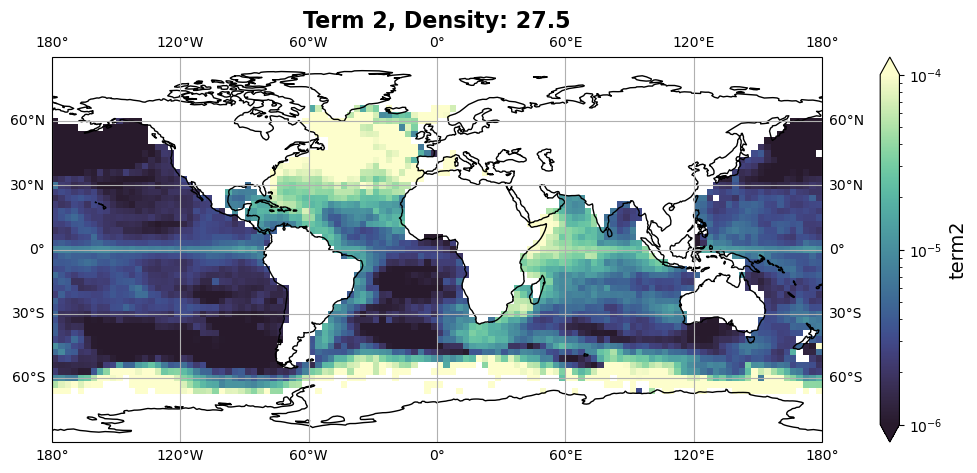

In [24]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term2.sel(density=density, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-6, vmax=1e-4))
ax.set_title('Term 2, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term2_275.png', bbox_inches='tight')

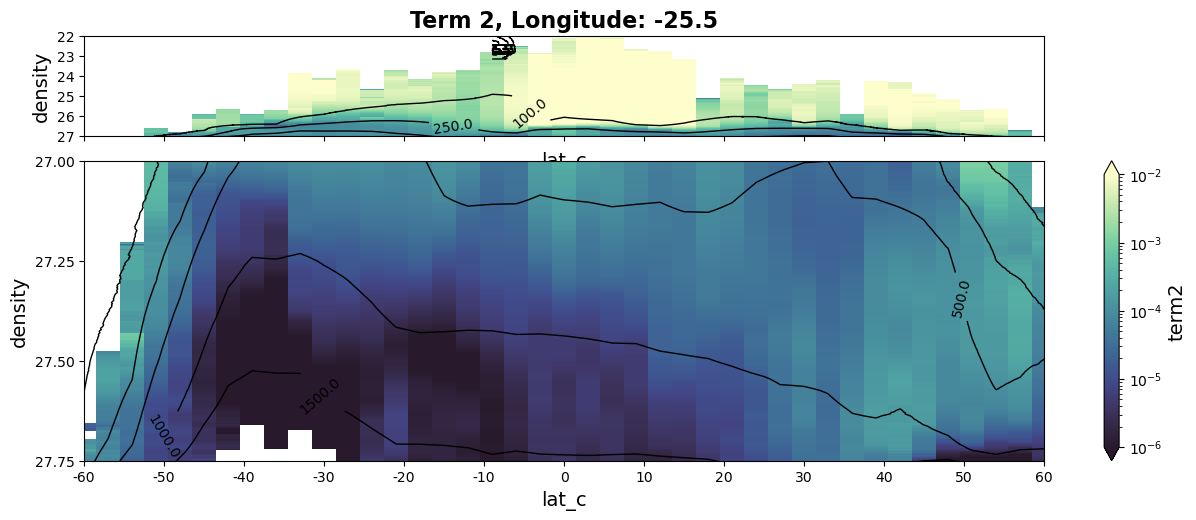

In [26]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-6, vmax=1e-2)
levels = [100, 250, 500, 1000, 1500, 2000]

term2.sel(lon=lon, method='nearest').plot(ax=top_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=top_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
top_ax.invert_yaxis()
top_ax.set_title(f'Term 2, Longitude: {K_rho.sel(lon=lon, method="nearest").lon.values}')

term2.sel(lon=lon, method='nearest').plot(ax=bottom_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=bottom_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
bottom_ax.invert_yaxis()
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/term2_275_sect.png', bbox_inches='tight')

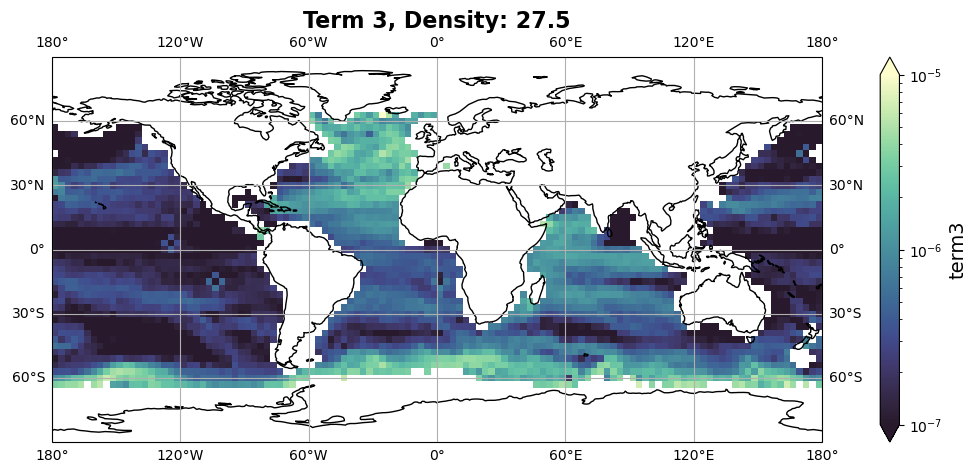

In [43]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term3.sel(density=density, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r,  norm=colors.LogNorm(vmin=1e-7, vmax=1e-5))
#ax.set_title('sqrt(dT/dx**2 + dT/dy**2), density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
ax.set_title('Term 3, Density: {}'.format(np.round(term3.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term3_NOSQUARE_275.png', bbox_inches='tight')

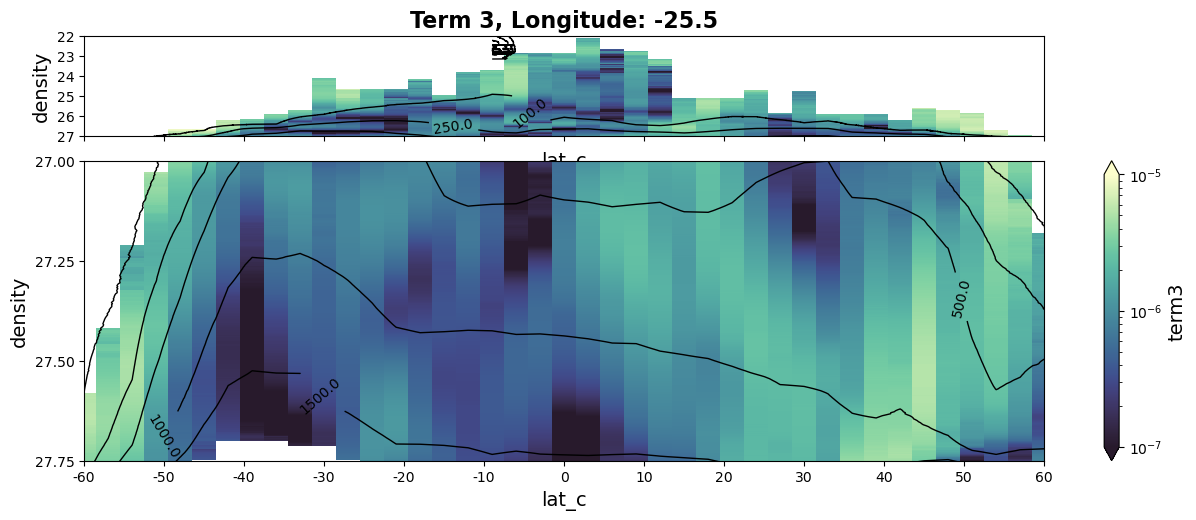

In [45]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-7, vmax=1e-5)
levels = [100, 250, 500, 1000, 1500, 2000]

term3.sel(lon=lon, method='nearest').plot(ax=top_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=top_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
top_ax.invert_yaxis()
top_ax.set_title(f'Term 3, Longitude: {K_rho.sel(lon=lon, method="nearest").lon.values}')

term3.sel(lon=lon, method='nearest').plot(ax=bottom_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=bottom_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
bottom_ax.invert_yaxis()
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/term3_275_sect.png', bbox_inches='tight')

CPU times: user 693 ms, sys: 33 ms, total: 726 ms
Wall time: 723 ms


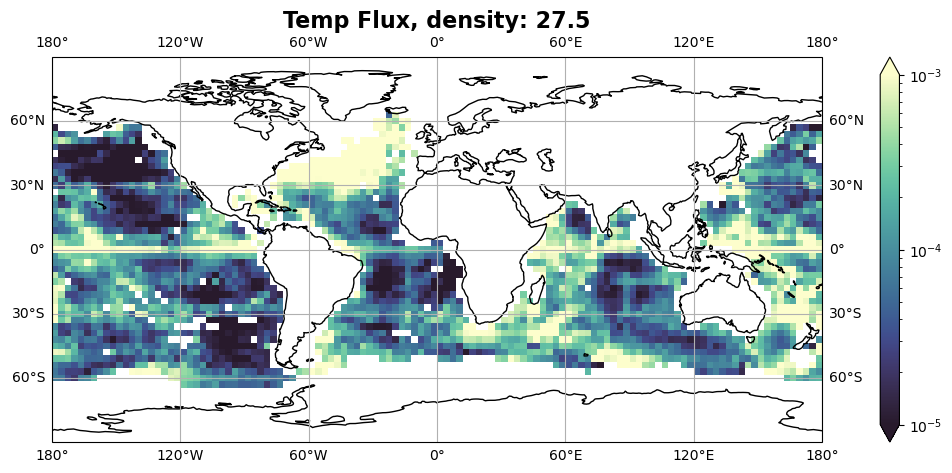

In [51]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
temp_flux_dxdy.sel(density=density, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-5, vmax=1e-3))
plt.title('Temp Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/temp_flux_275.png', bbox_inches='tight')

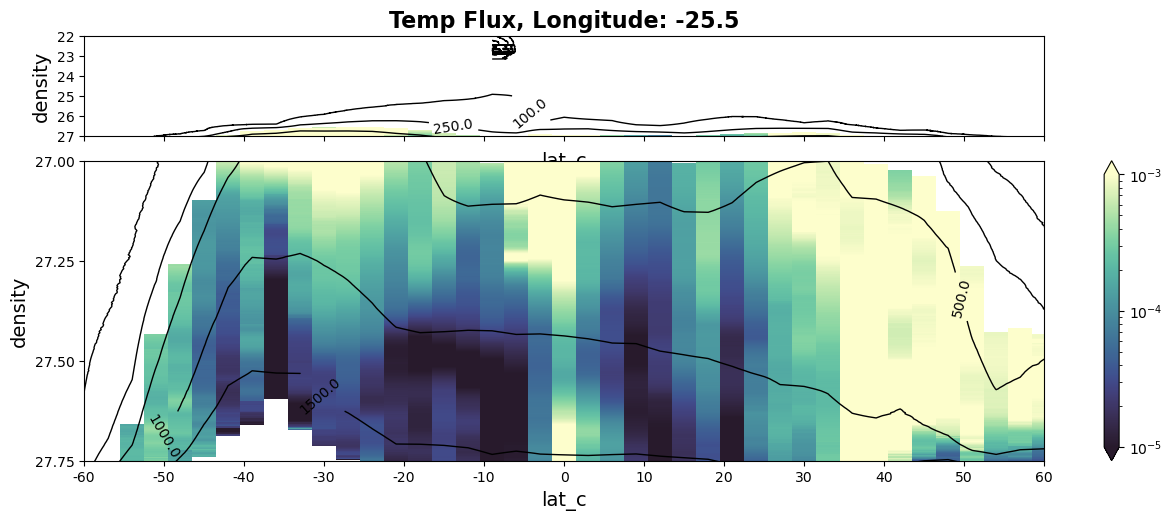

In [54]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-5, vmax=1e-3)
levels = [100, 250, 500, 1000, 1500, 2000]

temp_flux_dxdy.sel(lon=lon, method='nearest').plot(ax=top_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=top_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
top_ax.invert_yaxis()
top_ax.set_title(f'Temp Flux, Longitude: {K_rho.sel(lon=lon, method="nearest").lon.values}')

temp_flux_dxdy.sel(lon=lon, method='nearest').plot(ax=bottom_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=bottom_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
bottom_ax.invert_yaxis()
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/temp_flux_275_sect.png', bbox_inches='tight')

In [55]:
density = temp_flux_dxdy.density + 1000
heat_flux = temp_flux_dxdy*density*4000

CPU times: user 974 ms, sys: 73.7 ms, total: 1.05 s
Wall time: 1.04 s


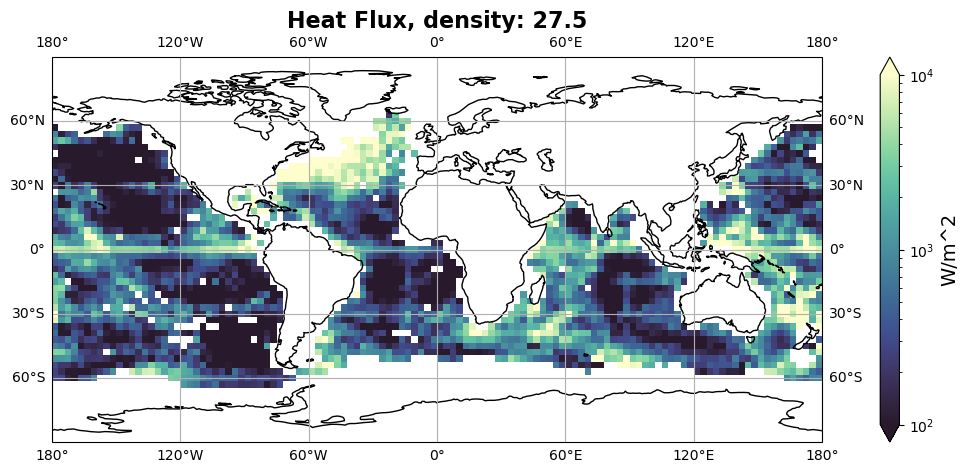

In [59]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
heat_flux.sel(density=density, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e2, vmax=1e4), cbar_kwargs={'label': 'W/m^2'})
plt.title('Heat Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/heat_flux_275.png', bbox_inches='tight')

heat flux = $\widetilde{u}\widetilde{T} \frac{^\circ C m}{s}*\rho_0 \frac{kg}{m^3}*C_p \frac{J}{kg ^\circ C}$

heat flux = $2570 \frac{W}{m^2}$

where $\rho_0 = density + 1000$,  $C_p = 4000 \frac{J}{kg ^\circ C}$



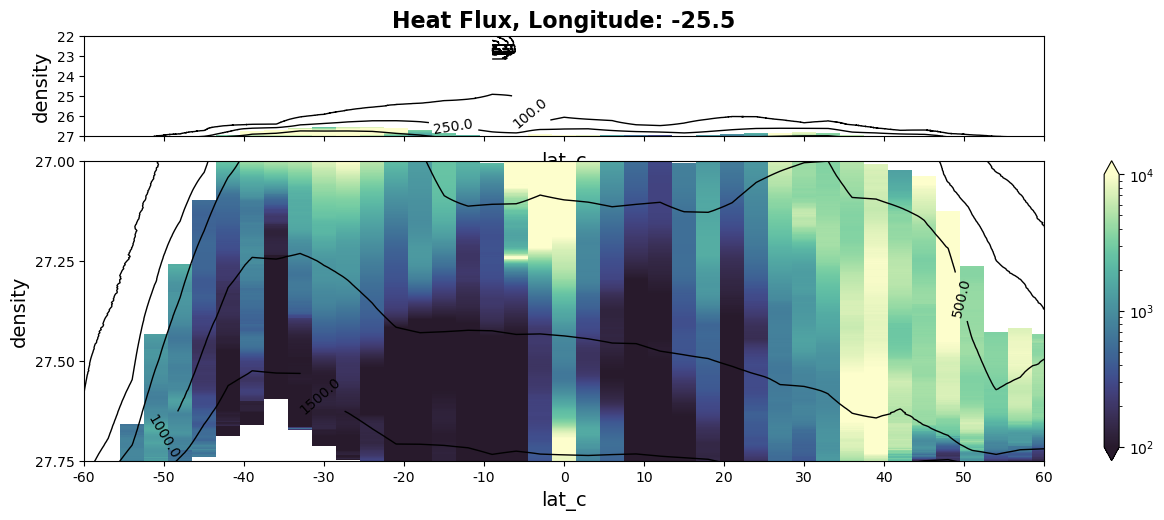

In [60]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e2, vmax=1e4)
levels = [100, 250, 500, 1000, 1500, 2000]

heat_flux.sel(lon=lon, method='nearest').plot(ax=top_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=top_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
top_ax.invert_yaxis()
top_ax.set_title(f'Heat Flux, Longitude: {K_rho.sel(lon=lon, method="nearest").lon.values}')

heat_flux.sel(lon=lon, method='nearest').plot(ax=bottom_ax, x='lat', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
contour = ds_rho.PRES.sel(lon_c=lon, method='nearest').plot.contour(ax=bottom_ax, x='lat_c', y='density', levels=levels, colors='k', linewidths=1)
plt.clabel(contour, fmt='%1.1f', colors='k', fontsize=10)
bottom_ax.invert_yaxis()
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/heat_flux_275_sect.png', bbox_inches='tight')

# Temp Flux using $K_e$

In [61]:
K_rho = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/K_rho_3dx.nc').K_filt_3dx

In [62]:
term2_ds = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/term2.nc').load()
term2 = term2_ds.ct_e_z2_filt.rename('term2')
term3 = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/Ke_term3.nc').rename('term3').load()

In [91]:
K_e = K_rho*term2/term3

In [92]:
dCT_dx = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/ct_m_dx.nc')
dCT_dy = xr.open_dataarray('/swot/SUM05/amf2288/var-boxes/ct_m_dy.nc')

In [1]:
F_CT_x = -K_e*dCT_dx
F_CT_y = -K_e*dCT_dy
F_CT_xy = -K_e*np.sqrt(dCT_dx**2 + dCT_dy**2)

NameError: name 'K_e' is not defined

Text(0.5, 1.0, 'dCT_dx, depth-averaged')

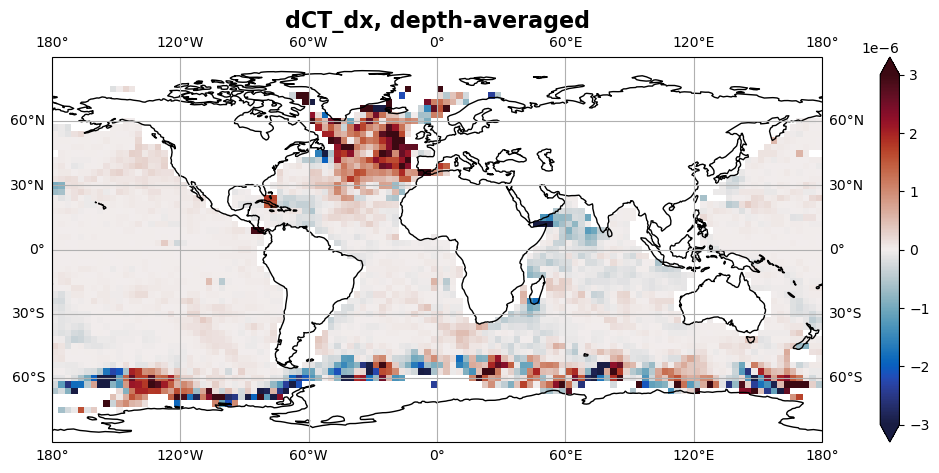

In [270]:
ds = dCT_dx
title= 'dCT_dx'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.000003, vmax=0.000003)

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds.sel(density=27.5, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}, depth-averaged')

Text(0.5, 1.0, 'F_CT_x')

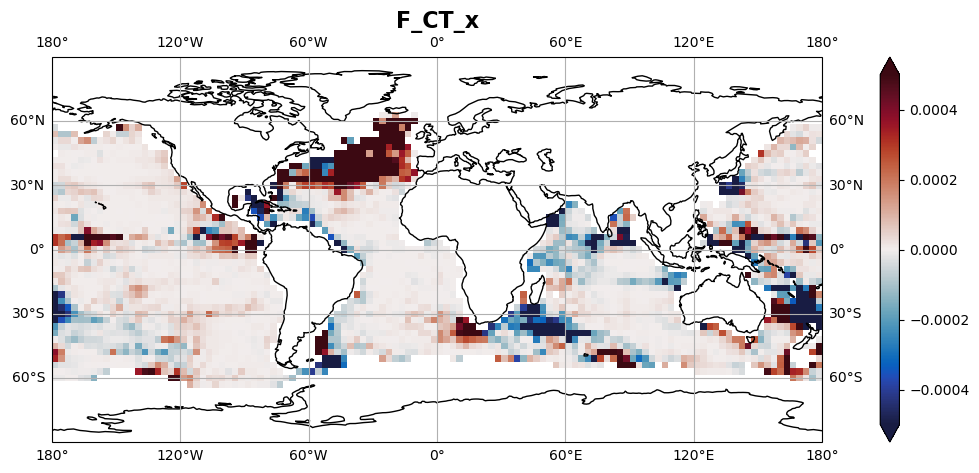

In [266]:
ds = -F_CT_x
title= 'F_CT_x'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.0005, vmax=0.0005)

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds.sel(density=27.5, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}')

In [271]:
ds_gridded_rho

NameError: name 'ds_gridded_rho' is not defined

Text(0.5, 1.0, 'dCT_dy, depth-averaged')

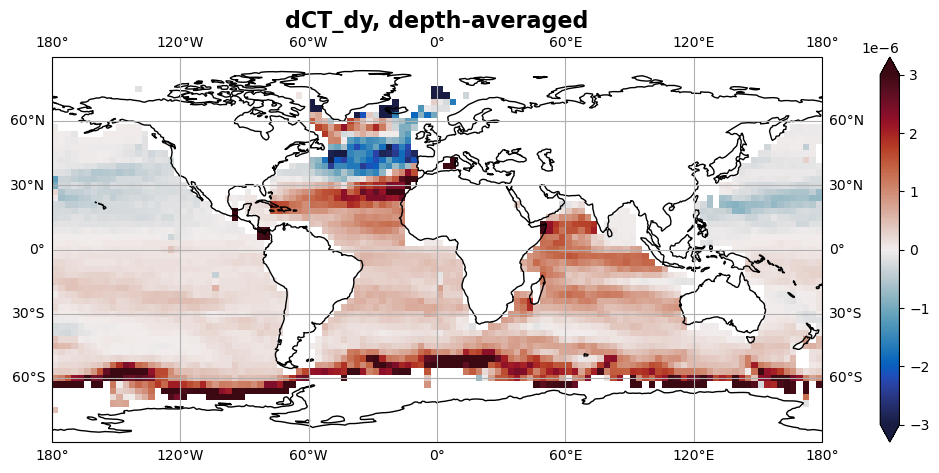

In [269]:
ds = dCT_dy
title= 'dCT_dy'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.000003, vmax=0.000003)

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds.sel(density=27.5, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}, depth-averaged')

Text(0.5, 1.0, 'F_CT_y')

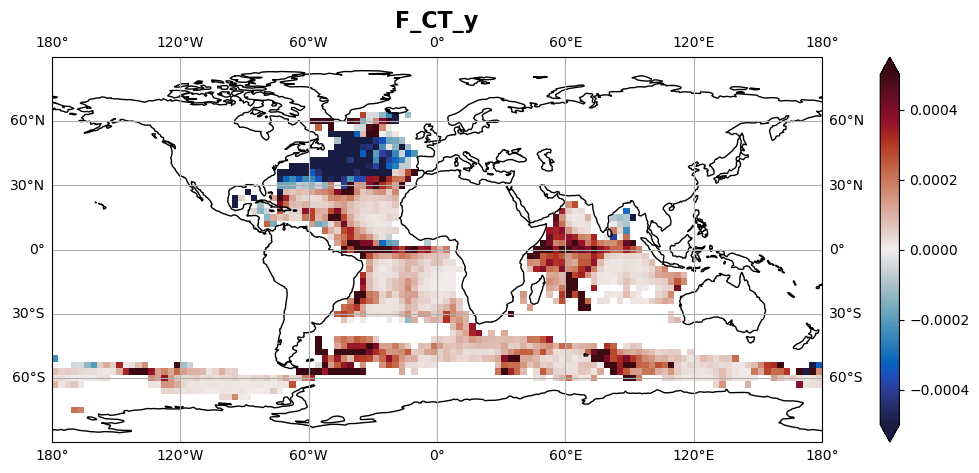

In [273]:
ds = -F_CT_y
title= 'F_CT_y'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.0005, vmax=0.0005)

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds.sel(density=27.7, method='nearest').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}')

In [106]:
# Choose a density slice—here using index, but you could use `.sel(density=...)` too
u = dCT_dx.mean('density')
v = dCT_dy.mean('density')

# Create meshgrid from coordinates for plotting
X, Y = u['lon'], u['lat']
XX, YY = np.meshgrid(X, Y, indexing='ij')  # match xarray's dimension order

# Transpose u and v to match meshgrid shape (lon x lat)
U = u.transpose('lon', 'lat').values
V = v.transpose('lon', 'lat').values

Text(0.5, 1.0, 'K_e*np.sqrt(F_CT_x**2 + F_CT_y**2)')

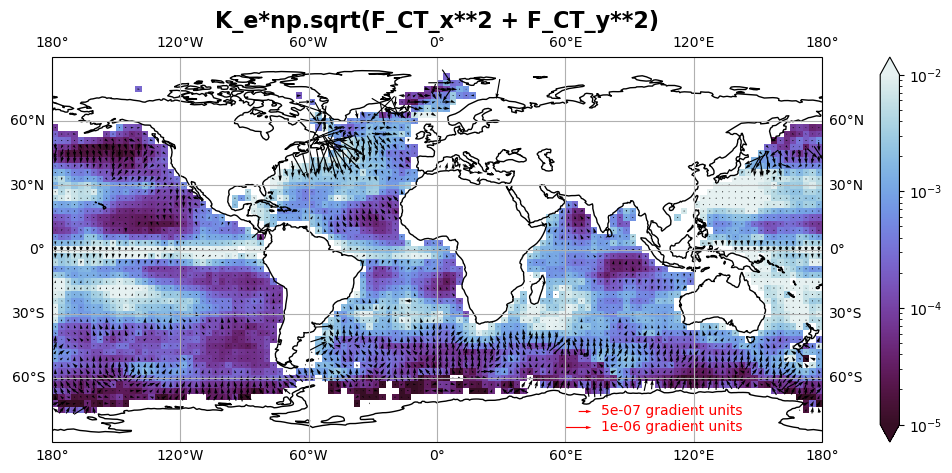

In [125]:
ds = -F_CT_xy
title= 'K_e*np.sqrt(F_CT_x**2 + F_CT_y**2)'
cmap, norm = cmo.dense_r, colors.LogNorm(vmin=1e-5, vmax=1e-2)

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds.mean('density').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
q = ax.quiver(XX, YY, U, V, scale=3e-4, pivot='middle', width=0.0015)
ax.quiverkey(q, X=0.7, Y=0.08, U=5e-6, label=f'{5e-7:.0e} gradient units', labelpos='E',color='r',labelcolor='r')
ax.quiverkey(q, X=0.7, Y=0.04, U=1e-5, label=f'{1e-6:.0e} gradient units', labelpos='E',color='r',labelcolor='r')
ax.set_title(f'{title}')

In [141]:
basin_rho = xr.open_dataarray('/swot/SUM05/amf2288/basin_rho.nc')

In [142]:
def basin_mask(ds, basin_ds, basin_value):
    mask = (basin_ds == basin_value)

    return ds.where(mask)

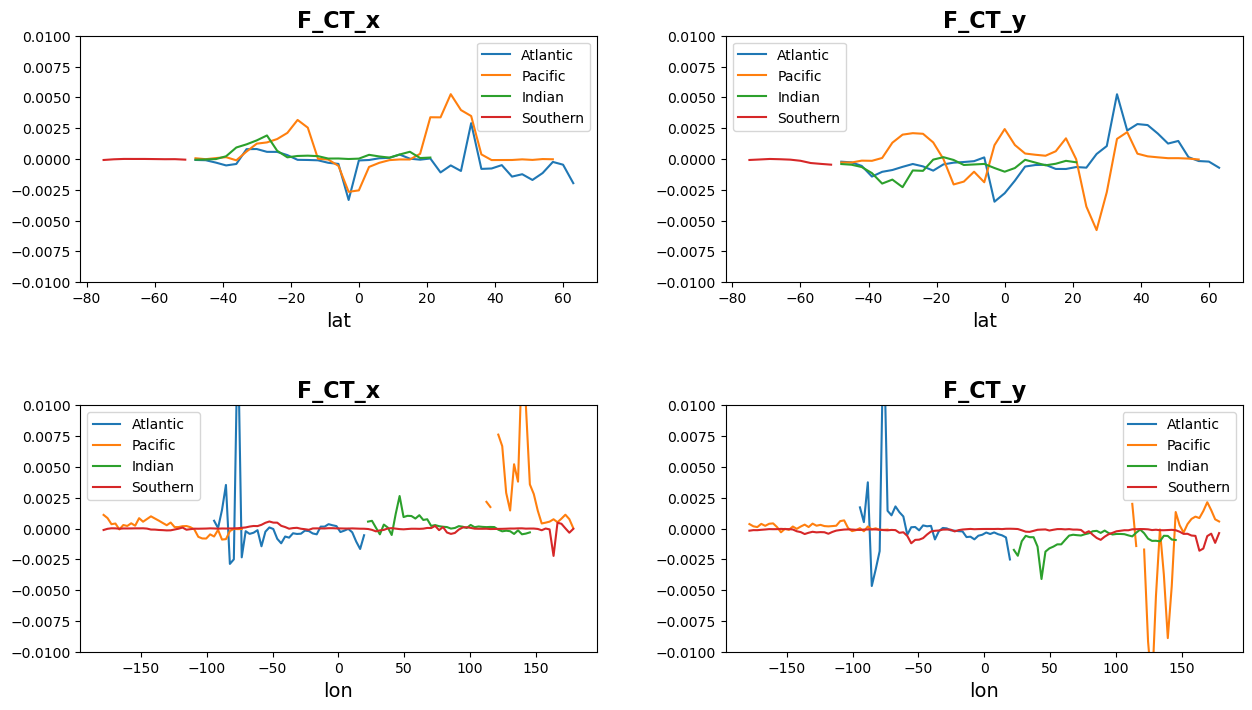

In [156]:
plt.figure(figsize=(15,8))

plt.subplot(221)
basin_mask(F_CT_x, basin_rho, 1).mean('density').mean('lon').plot(label='Atlantic')
basin_mask(F_CT_x, basin_rho, 2).mean('density').mean('lon').plot(label='Pacific')
basin_mask(F_CT_x, basin_rho, 3).mean('density').mean('lon').plot(label='Indian')
basin_mask(F_CT_x, basin_rho, 10).mean('density').mean('lon').plot(label='Southern')
plt.ylim(-0.01, 0.01)
plt.legend()
plt.title('F_CT_x')

plt.subplot(222)
basin_mask(F_CT_y, basin_rho, 1).mean('density').mean('lon').plot(label='Atlantic')
basin_mask(F_CT_y, basin_rho, 2).mean('density').mean('lon').plot(label='Pacific')
basin_mask(F_CT_y, basin_rho, 3).mean('density').mean('lon').plot(label='Indian')
basin_mask(F_CT_y, basin_rho, 10).mean('density').mean('lon').plot(label='Southern')
plt.ylim(-0.01, 0.01)
plt.legend()
plt.title('F_CT_y')

plt.subplot(223)
basin_mask(F_CT_x, basin_rho, 1).mean('density').mean('lat').plot(label='Atlantic')
basin_mask(F_CT_x, basin_rho, 2).mean('density').mean('lat').plot(label='Pacific')
basin_mask(F_CT_x, basin_rho, 3).mean('density').mean('lat').plot(label='Indian')
basin_mask(F_CT_x, basin_rho, 10).mean('density').mean('lat').plot(label='Southern')
plt.ylim(-0.01, 0.01)
plt.legend()
plt.title('F_CT_x')

plt.subplot(224)
basin_mask(F_CT_y, basin_rho, 1).mean('density').mean('lat').plot(label='Atlantic')
basin_mask(F_CT_y, basin_rho, 2).mean('density').mean('lat').plot(label='Pacific')
basin_mask(F_CT_y, basin_rho, 3).mean('density').mean('lat').plot(label='Indian')
basin_mask(F_CT_y, basin_rho, 10).mean('density').mean('lat').plot(label='Southern')
plt.ylim(-0.01, 0.01)
plt.legend()
plt.title('F_CT_y')

plt.subplots_adjust(hspace=0.5, wspace=0.25)

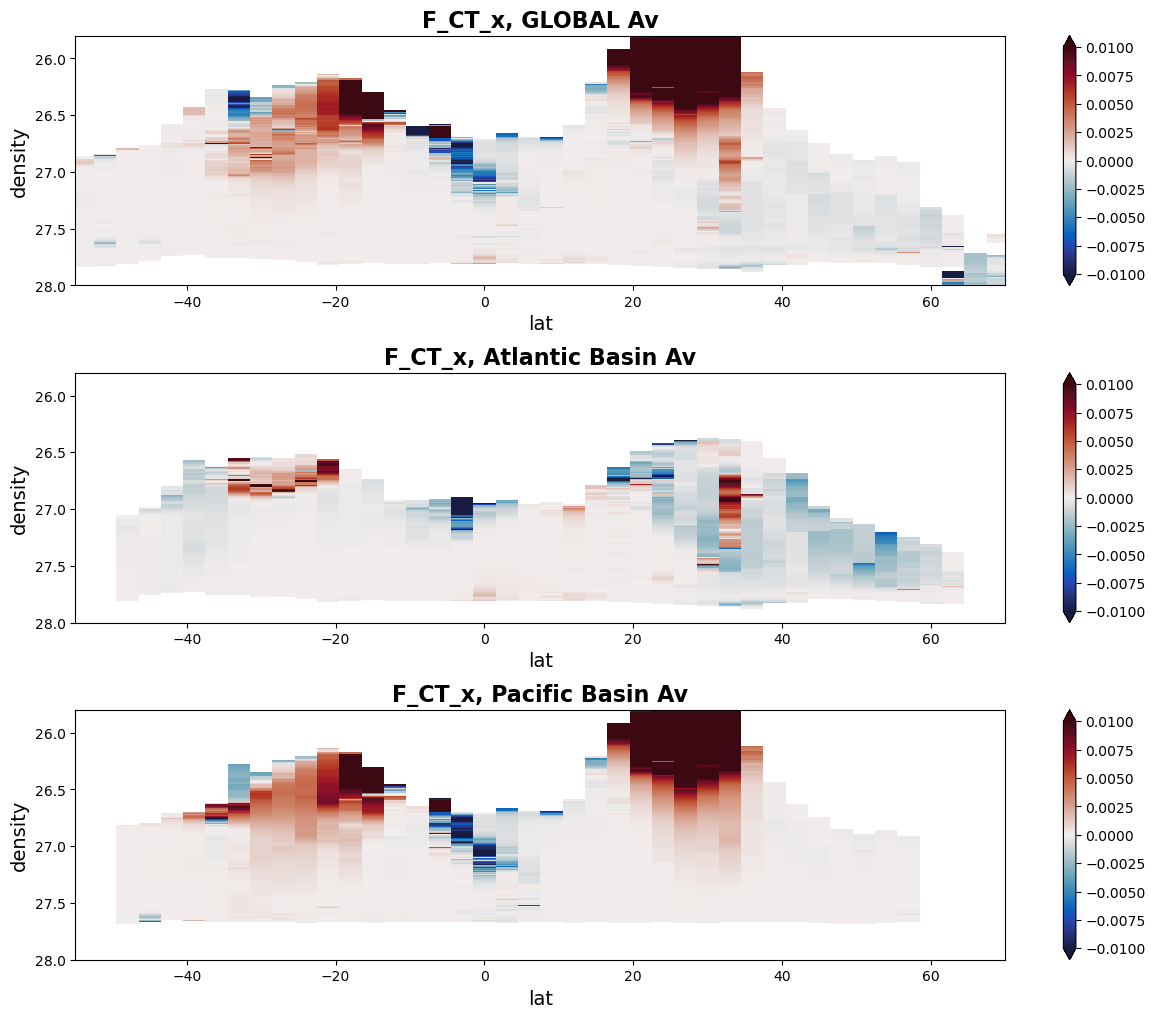

In [162]:
fig=plt.figure(figsize=(15,12))
ds = F_CT_x
title= 'F_CT_x'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.01, vmax=0.01)

plt.subplot(311)
ds.mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

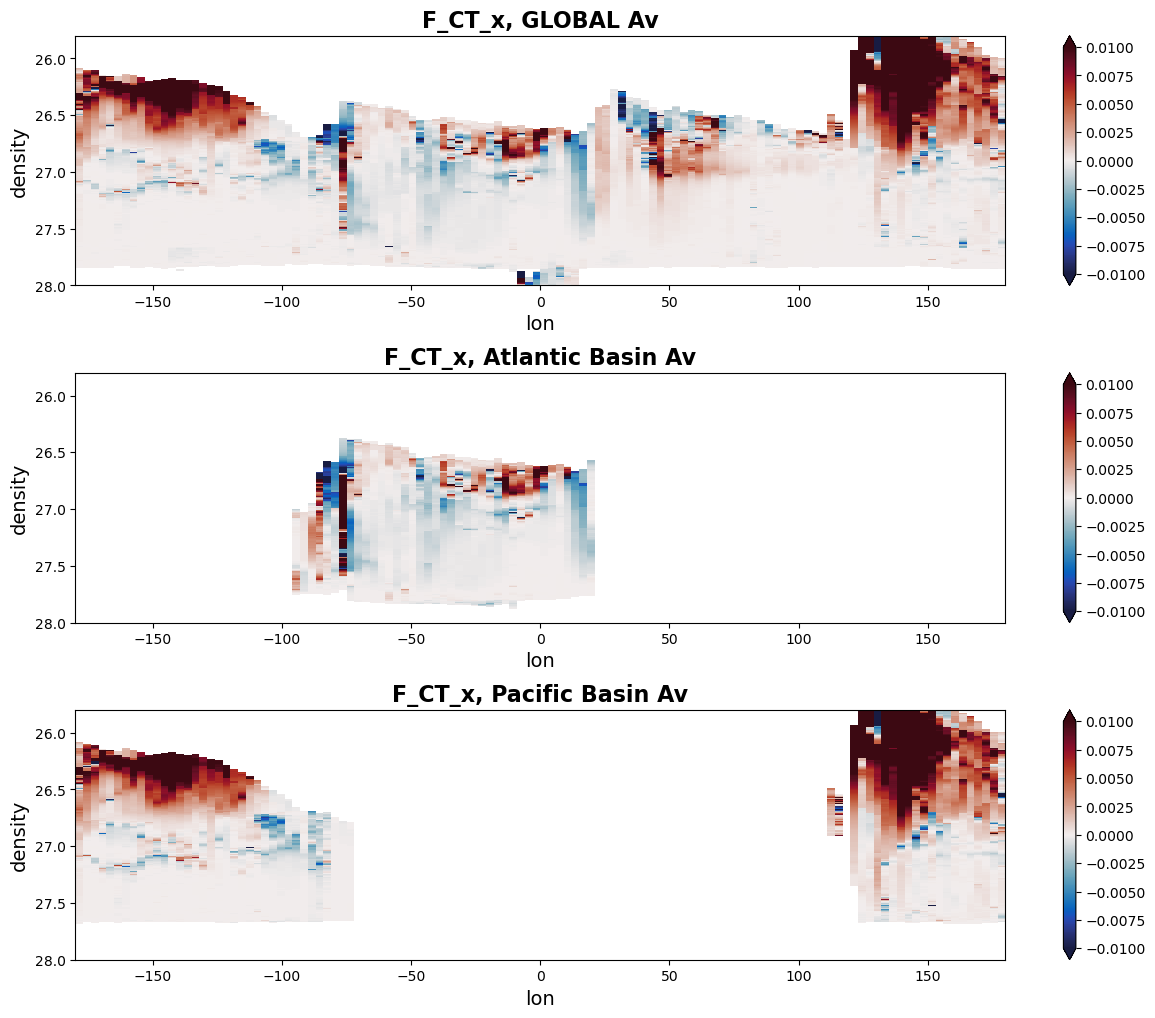

In [165]:
fig=plt.figure(figsize=(15,12))
ds = F_CT_x
title= 'F_CT_x'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.01, vmax=0.01)

plt.subplot(311)
ds.mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

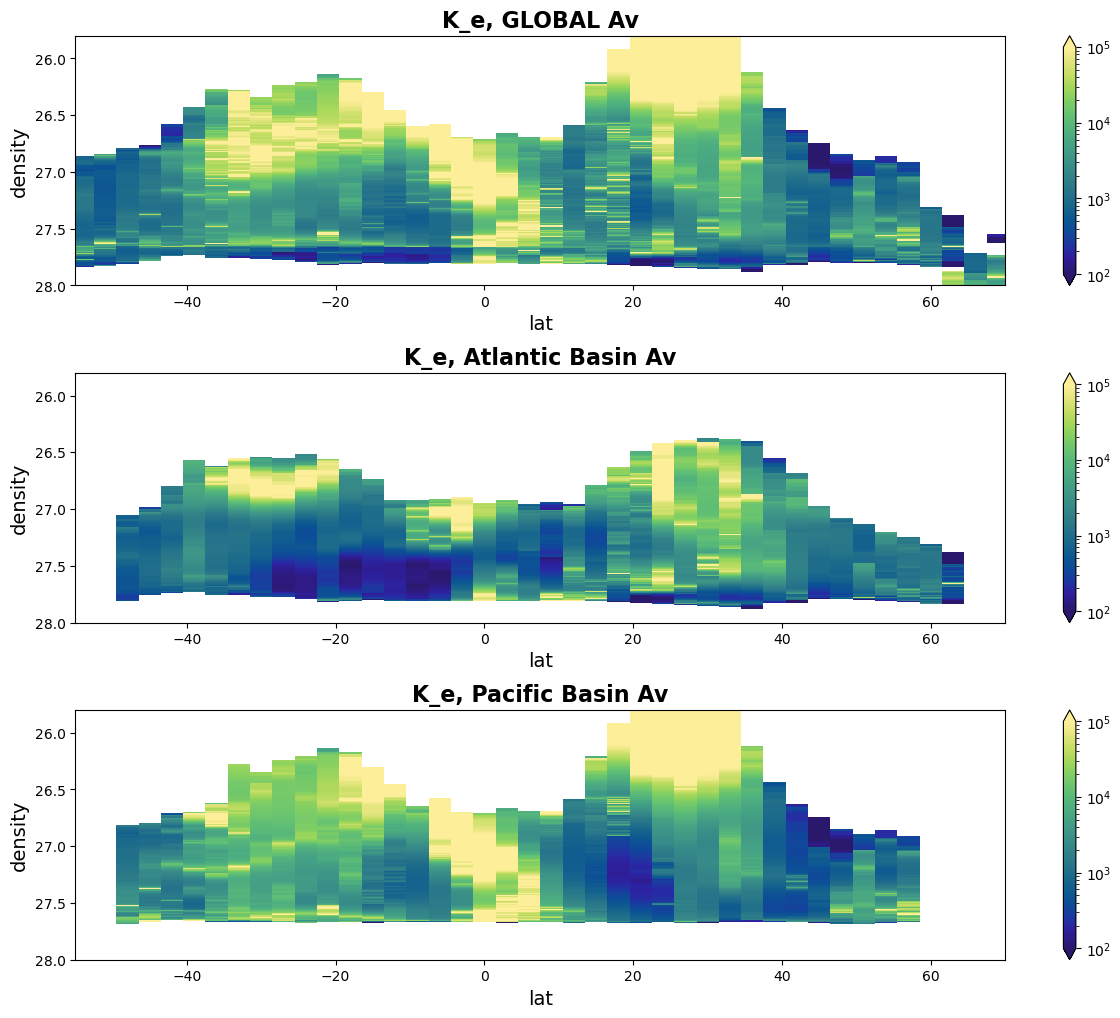

In [278]:
fig=plt.figure(figsize=(15,12))
ds = K_e
title= 'K_e'
cmap, norm = cmo.haline, colors.LogNorm(vmin=1e2, vmax=1e5)

plt.subplot(311)
ds.mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

In [283]:
term2

<xarray.DataArray 'term2' (density: 3200, lon: 120, lat: 59)> Size: 181MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * density  (density) float64 26kB 21.0 21.0 21.01 21.01 ... 28.99 29.0 29.0
  * lon      (lon) float64 960B -178.5 -175.5 -172.5 ... 172.5 175.5 178.5
  * lat      (lat) float64 472B -87.0 -84.0 -81.0 -78.0 ... 78.0 81.0 84.0 87.0

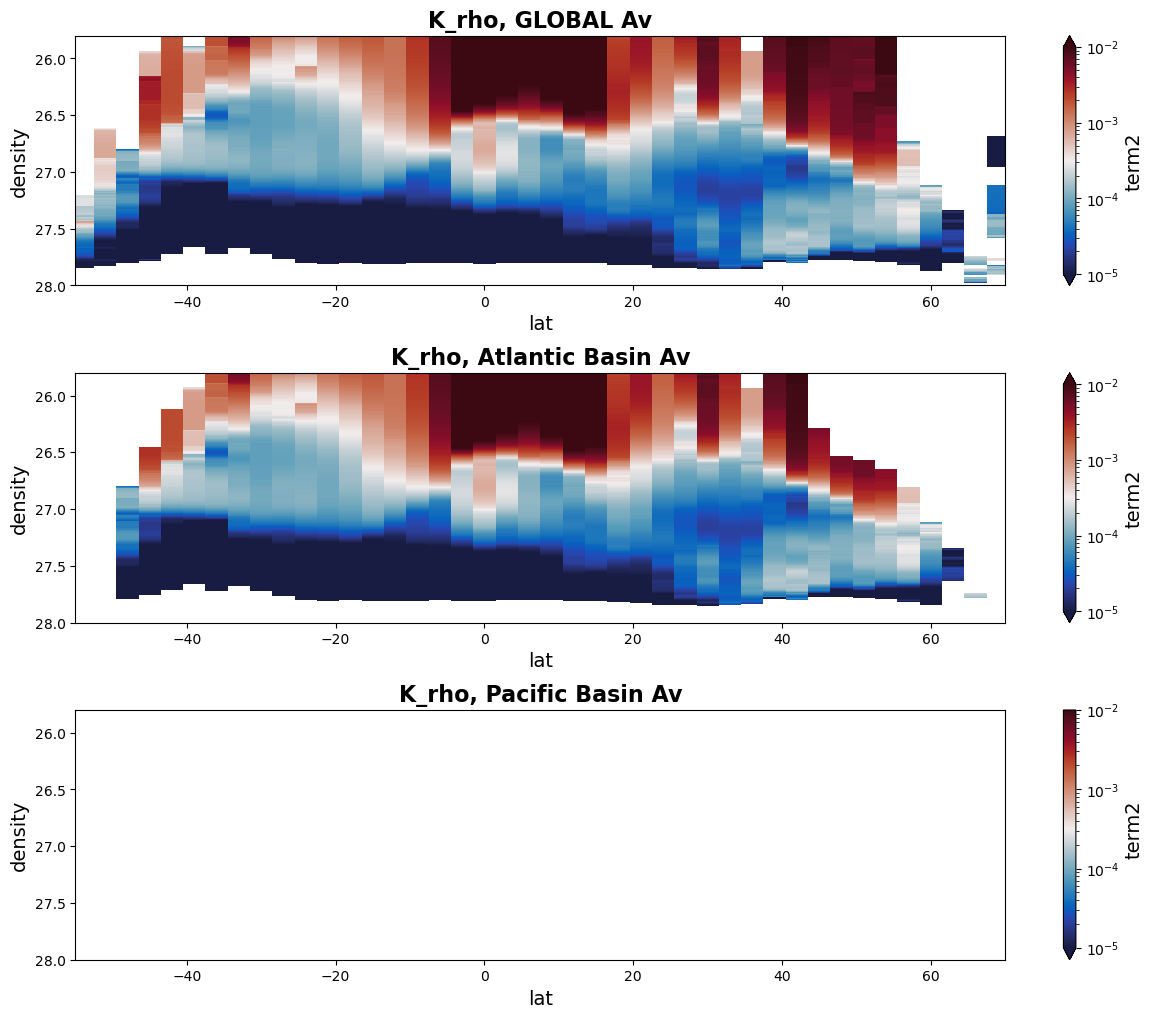

In [291]:
fig=plt.figure(figsize=(15,12))
ds = term2
title= 'K_rho'
cmap, norm = cmo.balance, colors.LogNorm(vmin=1e-5, vmax=1e-2)

plt.subplot(311)
ds.sel(lon=-25.5, method='nearest').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).sel(lon=-25.5, method='nearest').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).sel(lon=-25.5, method='nearest').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

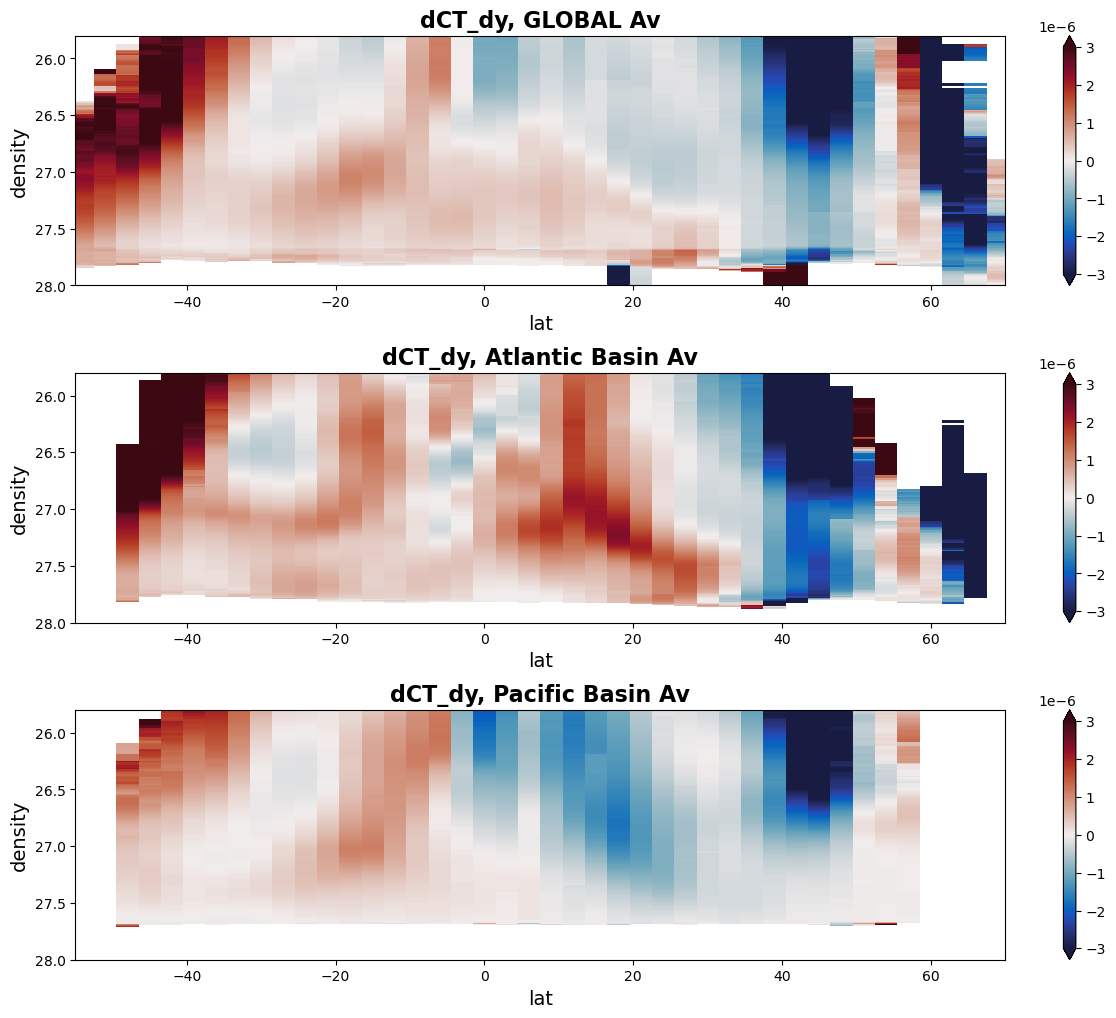

In [276]:
fig=plt.figure(figsize=(15,12))
ds = dCT_dy
title= 'dCT_dy'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.000003, vmax=0.000003)

plt.subplot(311)
ds.mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).mean('lon').plot(x='lat',y='density', cmap=cmap, norm=norm)
plt.xlim(-55,70)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

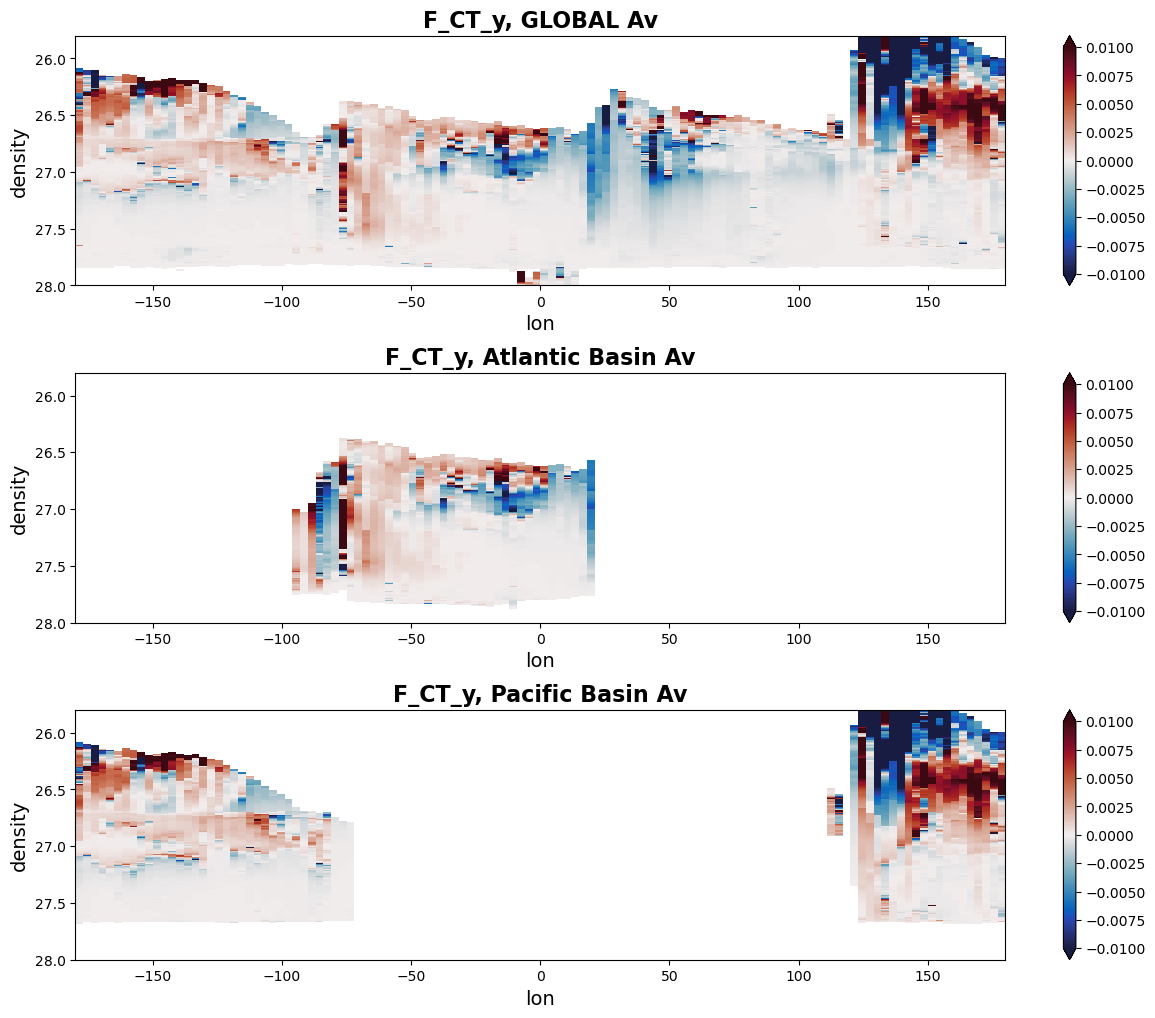

In [166]:
fig=plt.figure(figsize=(15,12))
ds = F_CT_y
title= 'F_CT_y'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.01, vmax=0.01)

plt.subplot(311)
ds.mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, GLOBAL Av')

plt.subplot(312)
basin_mask(ds, basin_rho, 1).mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, Atlantic Basin Av')

plt.subplot(313)
basin_mask(ds, basin_rho, 2).mean('lat').plot(x='lon',y='density', cmap=cmap, norm=norm)
plt.xlim(-180,180)
plt.ylim(28,25.8)
plt.title(f'{title}, Pacific Basin Av')

plt.subplots_adjust(hspace=0.35)

Text(0.5, 1.0, 'F_CT_x, depth-averaged')

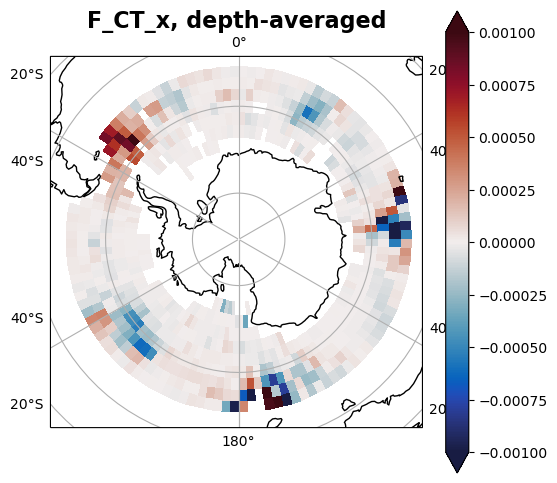

In [182]:
ds = basin_mask(F_CT_x, basin_rho, 10)
title= 'F_CT_x'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.001, vmax=0.001)

fig=plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-45], crs=ccrs.PlateCarree())
ds.mean('density').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}, depth-averaged')

Text(0.5, 1.0, 'F_CT_y, depth-averaged')

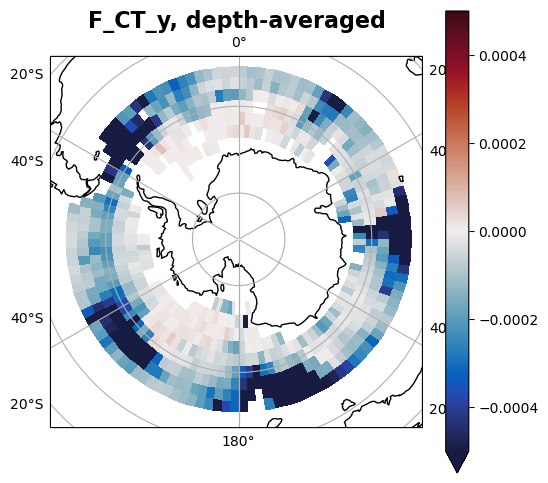

In [183]:
ds = basin_mask(F_CT_y, basin_rho, 10)
title= 'F_CT_y'
cmap, norm = cmo.balance, colors.Normalize(vmin=-0.0005, vmax=0.0005)

fig=plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-45], crs=ccrs.PlateCarree())
ds.mean('density').plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}, depth-averaged')

In [209]:
K_rho = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/K_rho_3dx.nc').K_filt_3dx

In [260]:
bath = xr.open_dataarray('https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO5/.elev/dods').rename({'X':'lon','Y':'lat'})

In [261]:
bath['lon'] = (bath.lon-180)

In [249]:
def prepare_mask_flox(bath, ds_target):
    """
    Bins high-resolution bathymetry data onto the coarse grid of ds_target,
    preserving mask structure using flox. Returns a binary land mask (0 ocean, 1 land).
    """
    # 1. Shift bath longitude from [0, 360) to [-180, 180)
    bath['lon'] = (bath['lon'] - 180)

    # 2. Bin using flox.reduce to average bath values in target grid boxes
    lat_bins = ds_target['lat'].values
    lon_bins = ds_target['lon'].values

    #ds_binned = xarray_reduce(
    #    bath,
    #    'LONGITUDE',
    #    'LATITUDE',
    #    func='mean',
    #    expected_groups=(
    #        pd.IntervalIndex.from_breaks(lon_bins),
    #        pd.IntervalIndex.from_breaks(lat_bins)
    #    ),
    #    fill_value=np.nan,
    #    skipna=True
    #)

    return bath

In [250]:
bath_3x3 = prepare_mask_flox(bath, K_rho)

In [264]:
bath

<xarray.DataArray 'elev' (lat: 2160, lon: 4320)> Size: 19MB
[9331200 values with dtype=int16]
Coordinates:
  * lat      (lat) float32 9kB 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92
  * lon      (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Attributes:
    units:           m
    long_name:       elevation/bathymetry
    scale_min:       -9964
    CS:              -9964.0
    ncolor:          253
    scale_max:       7964
    maxncolor:       253
    colorscalename:  topographycolorscale
    colormap:        0\n1973790\n4026644\n4026644\n28\n9125192\n9125192\n28\n...
    CE:              7964.0

Text(0.5, 1.0, 'Elevation, original dataset')

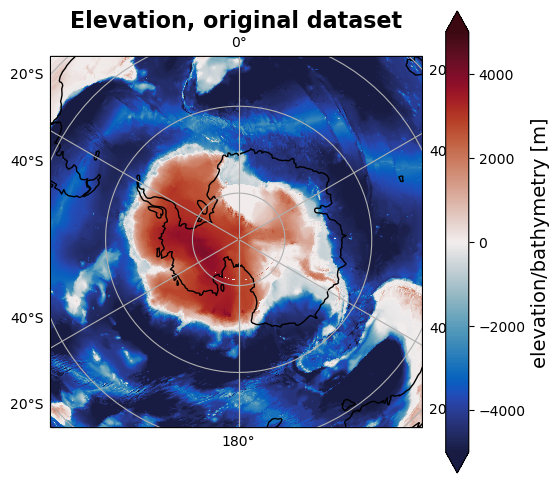

In [274]:
ds = bath
title= 'Elevation'
cmap, norm = cmo.balance, colors.Normalize(vmin=-5000, vmax=5000)

fig=plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-45], crs=ccrs.PlateCarree())
ds.plot(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.set_title(f'{title}, original dataset')